<a href="https://colab.research.google.com/github/Andres8bit/Machine-Learning/blob/main/cifar10_improved_using_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense,Activation, Flatten, Dropout,BatchNormalization, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def normalize_images(items):
  temp = np.zeros(shape=(items.shape))
  mean = np.mean(items,axis=(0,1,2,3))
  std = np.std(items,axis=(0,1,2,3))
  temp =(items - mean) /(std +1e-7)
  return temp

In [3]:
def display_loss(model):
  loss = model.history['loss']
  val_loss = model.history['val_loss']

  plt.figure()
  plt.plot(model.epoch, loss, 'r',label='Training loss')
  plt.plot(model.epoch,val_loss,'bo',label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss Value')
  plt.ylim([0,1])
  plt.legend()
  plt.show()

In [4]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
(x_train,x_valid) = x_train[5000:],x_train[:5000]
(y_train, y_valid) = y_train[5000:],y_train[:5000]

In [7]:
# Training, Test, and validation data split:
print('x_train = ',x_train.shape)
print('x_valid = ',x_valid.shape)
print('x_test = ',x_test.shape)

x_train =  (45000, 32, 32, 3)
x_valid =  (5000, 32, 32, 3)
x_test =  (10000, 32, 32, 3)


(45000, 10)


In [8]:

# Data Normalization:
x_train = normalize_images(x_train)
x_valid = normalize_images(x_valid)
x_test = normalize_images(x_test)

In [9]:
# One-Hot Encocding of lables:
y_train = np_utils.to_categorical(y_train,10)
y_valid = np_utils.to_categorical(y_valid,10)
y_test = np_utils.to_categorical(y_test,10)

In [10]:
# Data Augmentation:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=False
)

datagen.fit(x_train)

In [11]:
# Mode Variables:
base_hidden_units = 32
weight_decay= 1e-4

# Model Architecture Sequentional API based:
model = Sequential()

# 1st Convolution:
model.add(Conv2D(base_hidden_units,kernel_size=3,padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay), 
                 input_shape=x_train.shape[1:]))
# Relu is our main activation function
model.add(Activation('relu'))
# Batch Normalization will be applied to each Convolutional layer
model.add(BatchNormalization()) 

# 2nd Convolution:
model.add(Conv2D(base_hidden_units,kernel_size=3,padding='same',
                 kernel_regularizer=regularizers.L2(weight_decay)))
# Activation:
model.add(Activation('relu'))
# Batch Normalization:
model.add(BatchNormalization())
# Pool & Dropout:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 3rd Convolution:
model.add(Conv2D(base_hidden_units*2, kernel_size=3,padding='same',
                 kernel_regularizer=regularizers.L2(weight_decay)))
# Activation:
model.add(Activation('relu'))
# Batch Normalization:
model.add(BatchNormalization())

# 4rd Convolution:
model.add(Conv2D(base_hidden_units * 2,kernel_size=3,padding='same',
                 kernel_regularizer=regularizers.L2(weight_decay)))
# Activation
model.add(Activation('relu'))
# Batch Normaliation:
model.add(BatchNormalization())
# Pool & Dropout:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# 5th Convolution:
model.add(Conv2D(base_hidden_units * 4,kernel_size=3,padding='same',
                 kernel_regularizer=regularizers.L2(weight_decay)))
# Activation
model.add(Activation('relu'))
# Batch Normaliation:
model.add(BatchNormalization())

# 6th Convolution:
model.add(Conv2D(base_hidden_units * 4,kernel_size=3,padding='same',
                 kernel_regularizer=regularizers.L2(weight_decay)))
# Activation
model.add(Activation('relu'))
# Batch Normaliation:
model.add(BatchNormalization())
# Pool & Dropout:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Final Fully Connected Layer:
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [12]:
batch_size = 128
epochs = 200

checkpointer = ModelCheckpoint(filepath='model.100epochs.hdfs',verbose=1,save_best_only=True)
optimizer = keras.optimizers.Adam(learning_rate=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history = model.fit(datagen.flow(x_train,y_train,batch_size=batch_size)
                              ,callbacks=[checkpointer],steps_per_epoch=x_train.shape[0]//batch_size,
                              epochs=epochs,verbose=2,validation_data=(x_valid,y_valid))


Epoch 1/200
351/351 - 64s - loss: 2.8264 - accuracy: 0.2651 - val_loss: 2.0666 - val_accuracy: 0.2796

Epoch 00001: val_loss improved from inf to 2.06659, saving model to model.100epochs.hdfs
INFO:tensorflow:Assets written to: model.100epochs.hdfs/assets
Epoch 2/200
351/351 - 17s - loss: 2.0968 - accuracy: 0.3533 - val_loss: 1.5476 - val_accuracy: 0.4718

Epoch 00002: val_loss improved from 2.06659 to 1.54759, saving model to model.100epochs.hdfs
INFO:tensorflow:Assets written to: model.100epochs.hdfs/assets
Epoch 3/200
351/351 - 17s - loss: 1.8558 - accuracy: 0.4038 - val_loss: 1.5219 - val_accuracy: 0.4770

Epoch 00003: val_loss improved from 1.54759 to 1.52188, saving model to model.100epochs.hdfs
INFO:tensorflow:Assets written to: model.100epochs.hdfs/assets
Epoch 4/200
351/351 - 17s - loss: 1.7263 - accuracy: 0.4417 - val_loss: 1.4894 - val_accuracy: 0.4890

Epoch 00004: val_loss improved from 1.52188 to 1.48944, saving model to model.100epochs.hdfs
INFO:tensorflow:Assets written 

In [13]:
scores = model.evaluate(x_test,y_test,batch_size=128,verbose=1)

79/79 [==============================] - 1s 7ms/step - loss: 0.5448 - accuracy: 0.8566


In [14]:
print('\n Test Set Accuracy:: %.3f'%(scores[1]*100))


 Test Set Accuracy:: 85.660


In [22]:
test = model.predict(x_test)

In [23]:
print(test)

[[2.71663971e-08 5.03930729e-04 1.11181493e-04 ... 3.49186244e-08
  2.54911583e-06 1.43238663e-06]
 [1.60131287e-06 2.90130451e-02 9.75122240e-12 ... 3.49749786e-12
  9.70959306e-01 2.60288452e-05]
 [8.08830828e-06 2.79266834e-02 3.88203958e-09 ... 4.69971440e-09
  9.70979989e-01 1.08497695e-03]
 ...
 [6.67088884e-11 1.16191523e-09 5.43186616e-06 ... 1.34633126e-06
  1.33797293e-10 1.99606038e-08]
 [1.03201666e-04 9.99894857e-01 9.87946365e-08 ... 6.81406986e-10
  3.50086424e-07 4.79720427e-07]
 [4.29769111e-12 9.44420236e-12 4.12058105e-12 ... 9.99958038e-01
  1.31118996e-15 8.26638935e-15]]


In [24]:
print(test.shape)

(10000, 10)


In [30]:
print(np.argmax(test,axis=1))

[3 8 8 ... 5 1 7]


In [29]:
print(np.argmax(y_test,axis=1))

[3 8 8 ... 5 1 7]


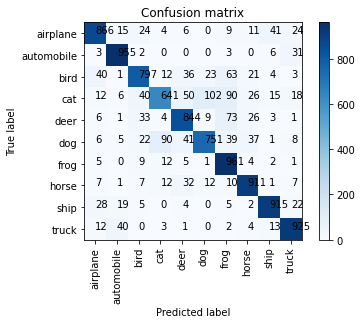

In [40]:
# Confusion Matrix:
from sklearn.metrics import confusion_matrix
class_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
confusion = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test),axis=1))

plt.imshow(confusion,cmap=plt.cm.Blues)
plt.colorbar()
indexes = np.arange(len(class_labels))

indexes = np.arange(len(class_labels))
for i in indexes:
    for j in indexes:
        plt.text(j, i, confusion[i, j])
plt.xticks(indexes, class_labels, rotation=90)
plt.xlabel('Predicted label')
plt.yticks(indexes, class_labels)
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()